In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, accuracy_score

In [2]:
import warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.rename(columns={'Geography': 'geography',
                   'Gender': 'gender',
                   'Age': 'age',
                   'Tenure': 'tenure',
                   'Balance': 'balance',
                   'NumOfProducts': 'num_of_products',
                   'CreditScore': 'credit_score',
                   'HasCrCard': 'has_cr_card',
                   'IsActiveMember': 'is_active_member',
                   'EstimatedSalary': 'estimate_salary',
                   'Exited': 'churn'},
          inplace=True)
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimate_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimate_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

# Check for null values
df.isnull().sum()
duplicate_rows = df[df.duplicated()]

# Printing the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Check for null values
null_values = df.isnull().sum()

# Printing the number of null values in each column
print(f"Number of null values in each column:\n{null_values}")

Number of duplicate rows: 0
Number of null values in each column:
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimate_salary     0
churn               0
dtype: int64


In [9]:
df_encoded = pd.get_dummies(df, columns=['geography', 'gender'], prefix=['geo_', 'gen_'])
df_encoded.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimate_salary,churn,geo__France,geo__Germany,geo__Spain,gen__Female,gen__Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


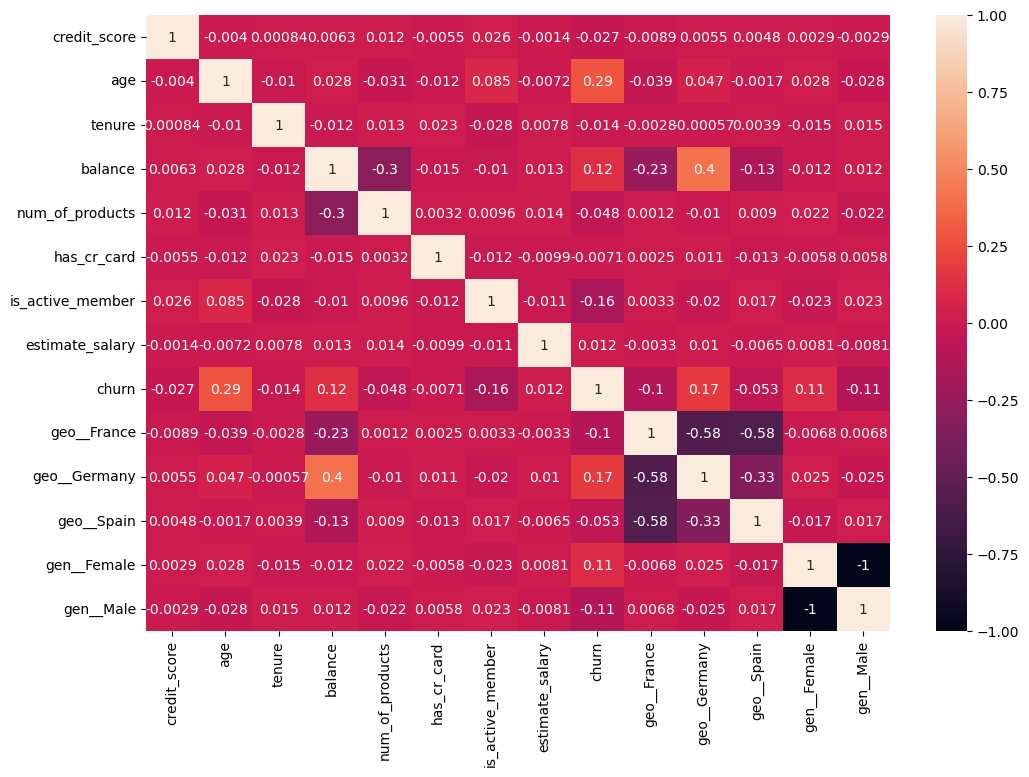

In [11]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

In [12]:
features = df_encoded.drop('churn', axis=1)
target = df_encoded['churn']

print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")

Features shape: (10000, 13)
Target shape: (10000,)


In [13]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


logistic_regression = LogisticRegression()


logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8005
Precision: 0.45161290322580644
Recall: 0.07124681933842239
F1 Score: 0.12307692307692307


In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_val, y_train_scaled, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)


logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train_scaled)


y_pred = logistic_regression.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.814
Precision: 0.5777777777777777
Recall: 0.1984732824427481
F1 Score: 0.2954545454545454


In [15]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_scaled)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train_scaled, y_train_scaled)


y_pred = best_logistic_regression.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8145
Precision: 0.5763888888888888
Recall: 0.21119592875318066
F1 Score: 0.3091247672253259


In [17]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()


knn.fit(X_train_scaled, y_train_scaled)


y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# tuning parameters
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_scaled)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train_scaled)


y_pred = best_knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.815
Precision: 0.5550239234449761
Recall: 0.2951653944020356
F1 Score: 0.3853820598006644
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.8225
Precision: 0.6130952380952381
Recall: 0.26208651399491095
F1 Score: 0.3672014260249555


<Axes: >

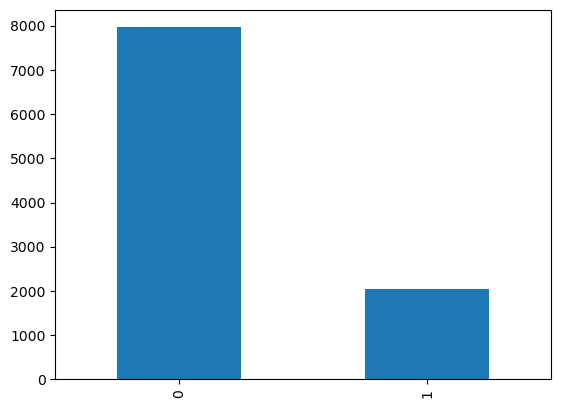

In [18]:
df['churn'].value_counts().plot(kind='bar')

In [19]:
features = df_encoded.drop('churn', axis=1)
target = df_encoded['churn']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_resampled, y_train_resampled)


y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6325
Precision: 0.3047945205479452
Recall: 0.6793893129770993
F1 Score: 0.42080378250591016


In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('svm', SVC()),
        ('rf', RandomForestClassifier()),
        ('gbdt', GradientBoostingClassifier())
    ])
]

results = []

for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(df_results)

                        Model  Accuracy  Precision    Recall  F1 Score
0          LogisticRegression    0.6325   0.304795  0.679389  0.420804
1                         SVC    0.4520   0.228990  0.755725  0.351479
2      RandomForestClassifier    0.8565   0.653179  0.575064  0.611637
3  GradientBoostingClassifier    0.8525   0.633152  0.592875  0.612352
4            VotingClassifier    0.7760   0.449541  0.623410  0.522388


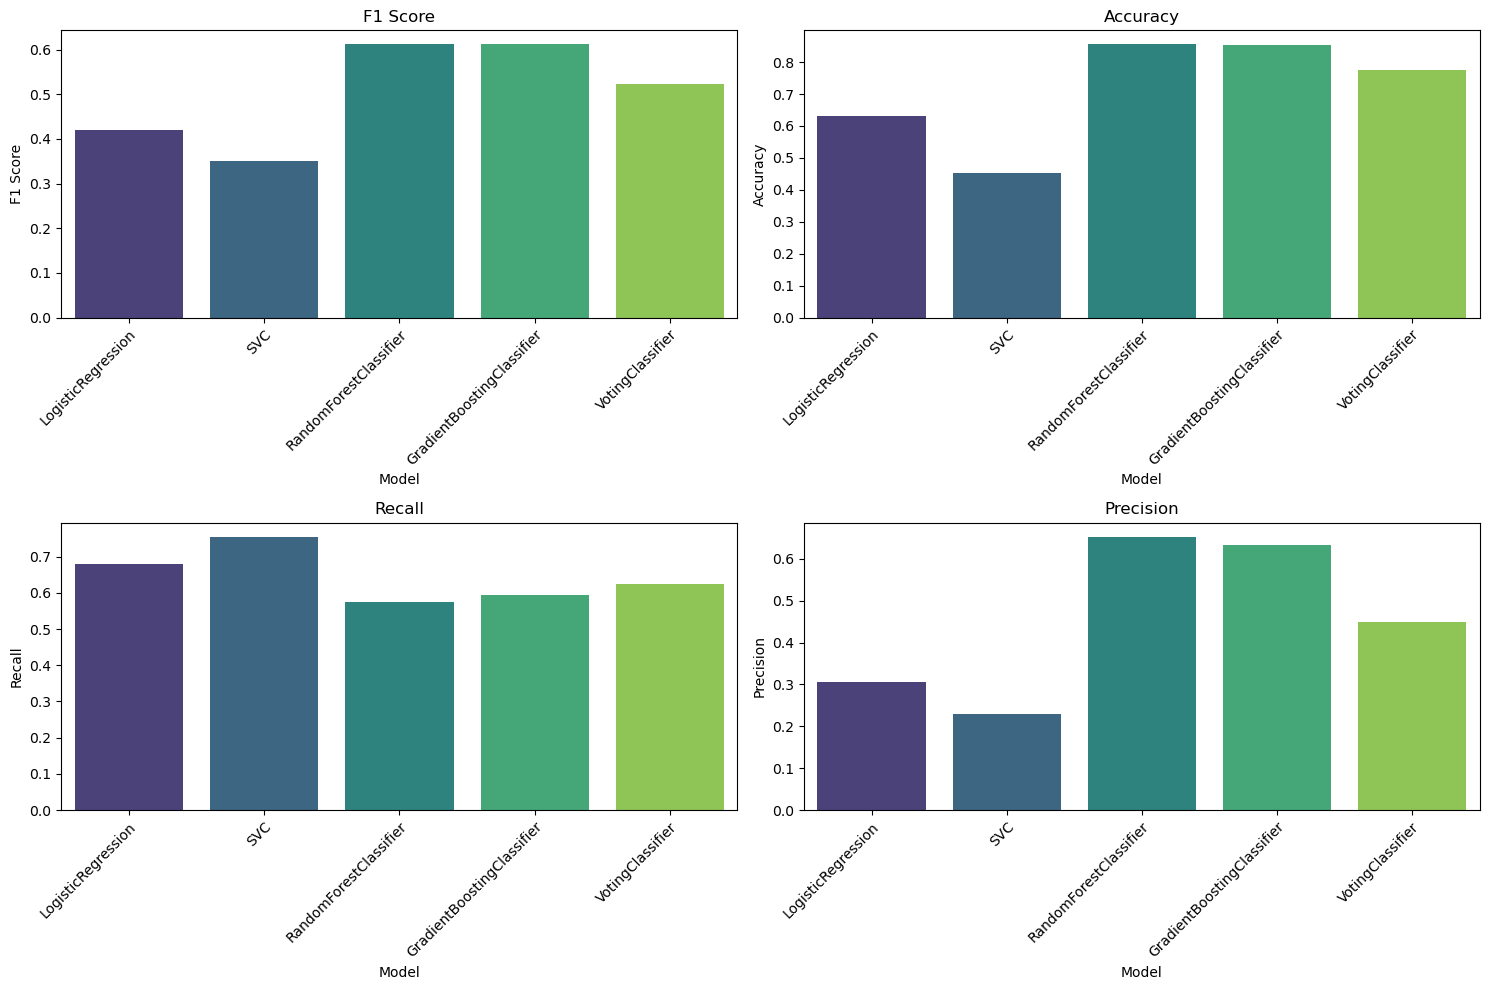

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot F1 score for each model
sns.barplot(x='Model', y='F1 Score', data=df_results, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('F1 Score')

# Plot Accuracy for each model
sns.barplot(x='Model', y='Accuracy', data=df_results, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Accuracy')

# Plot Recall for each model
sns.barplot(x='Model', y='Recall', data=df_results, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Recall')

# Plot Precision for each model
sns.barplot(x='Model', y='Precision', data=df_results, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Precision')

# Rotate x-axis labels for better readability
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Show the plot
plt.tight_layout()
plt.show()